<p style="font-family: 'Arial', sans-serif; font-size: 3rem; color: #6a1b9a; text-align: center; margin: 0; 
           text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1); background-color: #f5f5f5; padding: 10px; 
           border-radius: 10px; border: 4px solid #6a5acd; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1); width: 97%;">
    <span style="font-weight: bold; color: #6a1b9a; animation: pulse 2s infinite;"></span>COMPX310-2025 Lab 3 <br>Adult Income Dataset
</p>

<div align="center">
  <img src="https://wallpapercave.com/wp/wp9587350.jpg" width="600" height="350">
</div>

## Lab Information
- **Due Date:** October 08, 2025
- **Weight:** 3% of total course grade
- **Platform:** Google Colab, Kaggle, or VSCode (with Jupyter extension)

---

## 1. Introduction

In this lab, you will complete a **full ML pipeline** using the **Adult Income dataset**.  
This dataset predicts whether an individual earns more than $50K per year based on demographic and work-related features.

You will:
- Clean and preprocess real-world data
- Handle missing values
- Encode categorical variables
- Scale numerical variables
- Perform **exploratory data analysis (EDA)** with **at least 10 visualizations**
- Train and evaluate a **Logistic Regression model**
- Save the trained model to `.joblib` format for later use in an app

---

## 2. Dataset Information

**Source:** UCI Adult Income Dataset.  Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

| Feature Name     | Type         | Description                                   |
|------------------|--------------|-----------------------------------------------|
| age              | Numerical    | Age of individual                             |
| workclass        | Categorical  | Employment type                               |
| fnlwgt           | Numerical    | Final weight (sampling weight)                |
| education        | Categorical  | Highest level of education                    |
| education-num    | Numerical    | Education level (numeric)                     |
| marital-status   | Categorical  | Marital status                                |
| occupation       | Categorical  | Occupation type                               |
| relationship     | Categorical  | Family relationship status                    |
| race             | Categorical  | Race of individual                            |
| gender              | Categorical  | Gender                                     |
| capital-gain     | Numerical    | Investment income                             |
| capital-loss     | Numerical    | Losses from investment                        |
| hours-per-week   | Numerical    | Average weekly working hours                  |
| native-country   | Categorical  | Country of origin                             |
| income           | Target       | `<=50K` or `>50K`                             |

---

## 3. Step 1 – Load the Data
- Load dataset using `pandas`.
- Inspect first 5 rows (`.head()`).
- Check dataset shape.
- Display column info (`.info()`).

❓ **Question 1:** How many rows and columns does the dataset contain? What is the data type of each column?

---

48842 rows and 15 columns. 

In [123]:
# You need to use these Libraries throughout this Lab assignment. Please try to understand the prupose of every library and function.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import joblib

In [124]:
# Load data and see the head
adult = pd.read_csv("adult.csv")
print("Head of data:")
print(adult.head)

Head of data:
<bound method NDFrame.head of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   

In [125]:
# Check shape and Info
print("Shape of data:")
print(adult.shape)
print("Information of adult:")
print(adult.info)

Shape of data:
(48842, 15)
Information of adult:
<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-

## 4. Step 2 – Data Cleaning
- Replace `"?"` with `NaN`.
- Check missing values (`.isnull().sum()`).
- Decide how to handle missing values (drop or impute).
- Drop duplicates if any.

❓ **Question 2:** Which features contain missing values? How many rows were affected?

---

workclass, occupation and native-country has missing values. Three columns were affected.

In [126]:
# Replace '?' with NaN
adult.replace('?', np.NaN, inplace=True)

# Check missing values
print("Number of missing value:")
print(adult.isnull().sum())

Number of missing value:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


<Axes: >

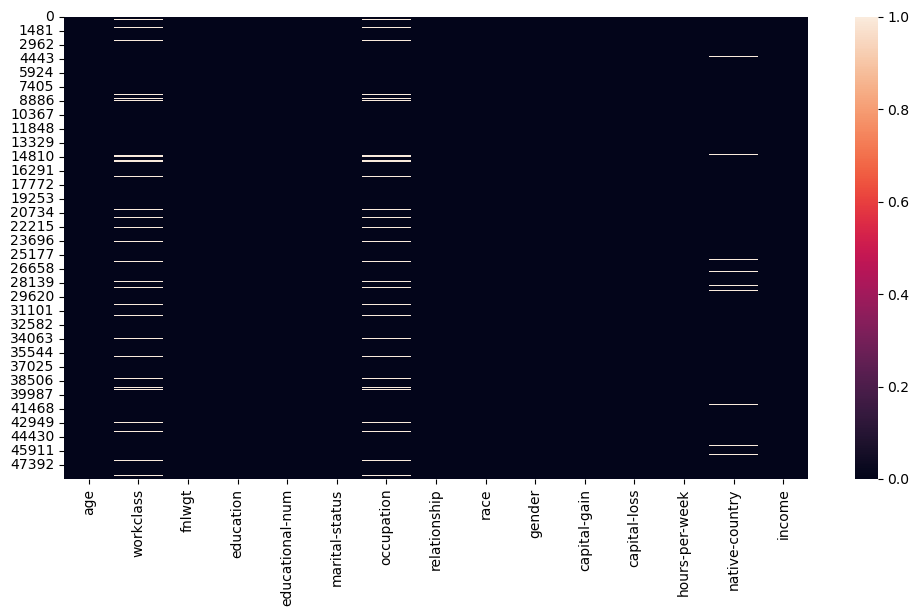

In [127]:
# Viusalize missing values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(adult.isnull())

In [128]:
# Drop rows with missing values and print shape again
adult_new = adult.drop(columns=["workclass", "occupation", "native-country"], axis=1, inplace=False)

print("New data shape is:")
print(adult_new.shape)

New data shape is:
(48842, 12)


## 5. Step 3 – Exploratory Data Analysis (EDA)
Perform **at least 10 visualizations** to understand the dataset. **Answer to the Question** below each Viusalization.  
Examples to try:
1. Histogram of **age**
2. Distribution of **hours-per-week**
3. Countplot of **workclass**
4. Countplot of **education**
5. Bar plot of **income by education**
6. Boxplot of **age vs income**
7. Correlation heatmap (numerical features)
8. Gender vs income (countplot)
9. Race distribution
10. Native country (top 10 countries)

❓**Plot 1**: *What does this distribution tell you about the age range? Are most individuals young, middle-aged, or older?*

<Axes: xlabel='age', ylabel='Count'>

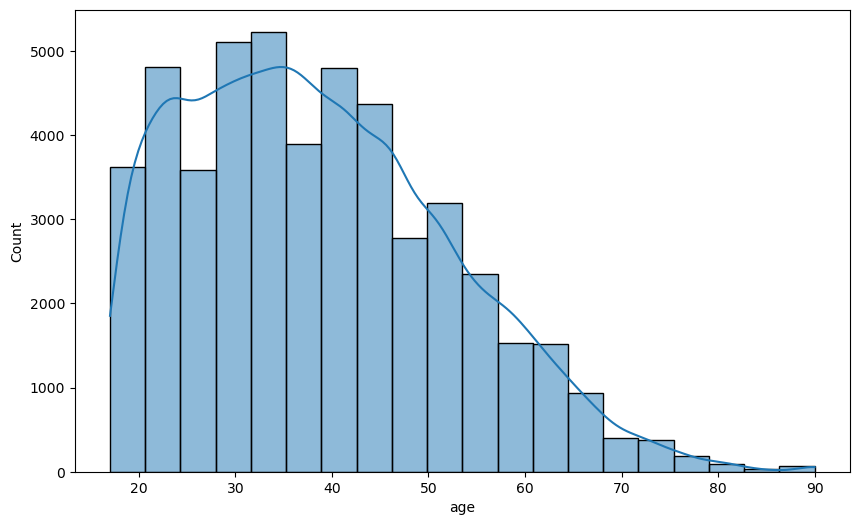

In [129]:
# 1. Histogram of Age
plt.figure(figsize=(10,6))

sns.histplot(data=adult, x="age", bins=20, kde=True)

With the age increasing, number of people increases first and then decreases after middle. Middle people is the most.

❓ **Plot 2**: *Do most people work around the standard 40 hours per week, or do you see other peaks?*

<Axes: xlabel='hours-per-week', ylabel='Count'>

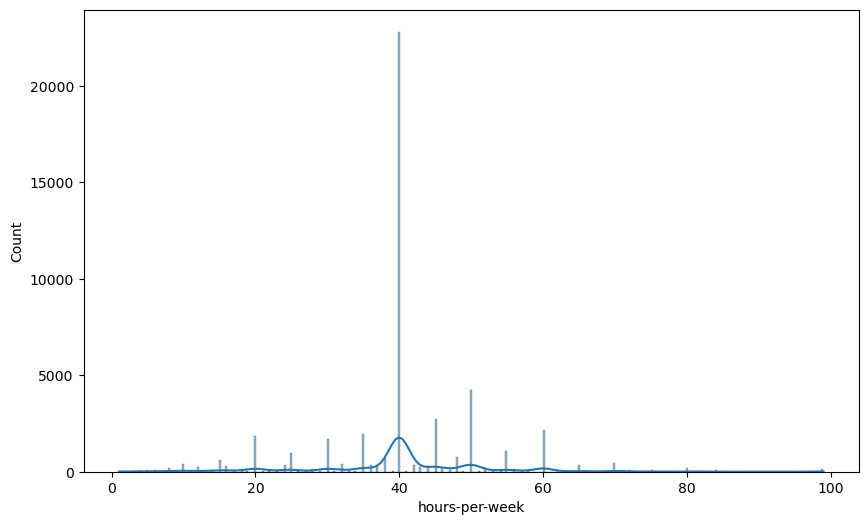

In [130]:
# 2. Histogram of Hours-per-week
plt.figure(figsize=(10,6))

sns.histplot(data=adult, x="hours-per-week", kde=True)

Yes, most people work 40 hours per week. But some people work 50 hours per week.

❓ **Plot 3**: *Which type of employment is most common? Which are least common?*

<Axes: xlabel='workclass', ylabel='count'>

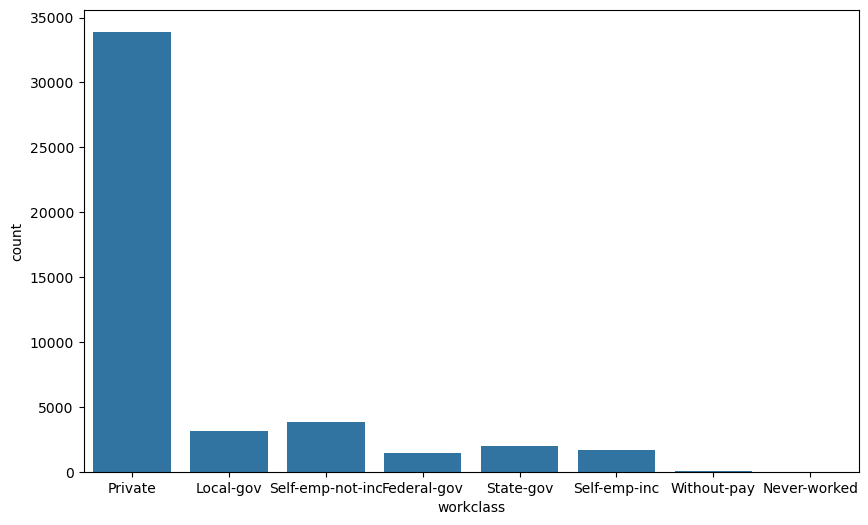

In [131]:
# 3. Countplot of Workclass
plt.figure(figsize=(10,6))

sns.countplot(data=adult, x="workclass")

Private is most common and never-worked is least common.

❓ **Plot 4**: *Which education levels are most frequent? Do you see a long tail of rare education levels?*

<Axes: xlabel='education', ylabel='count'>

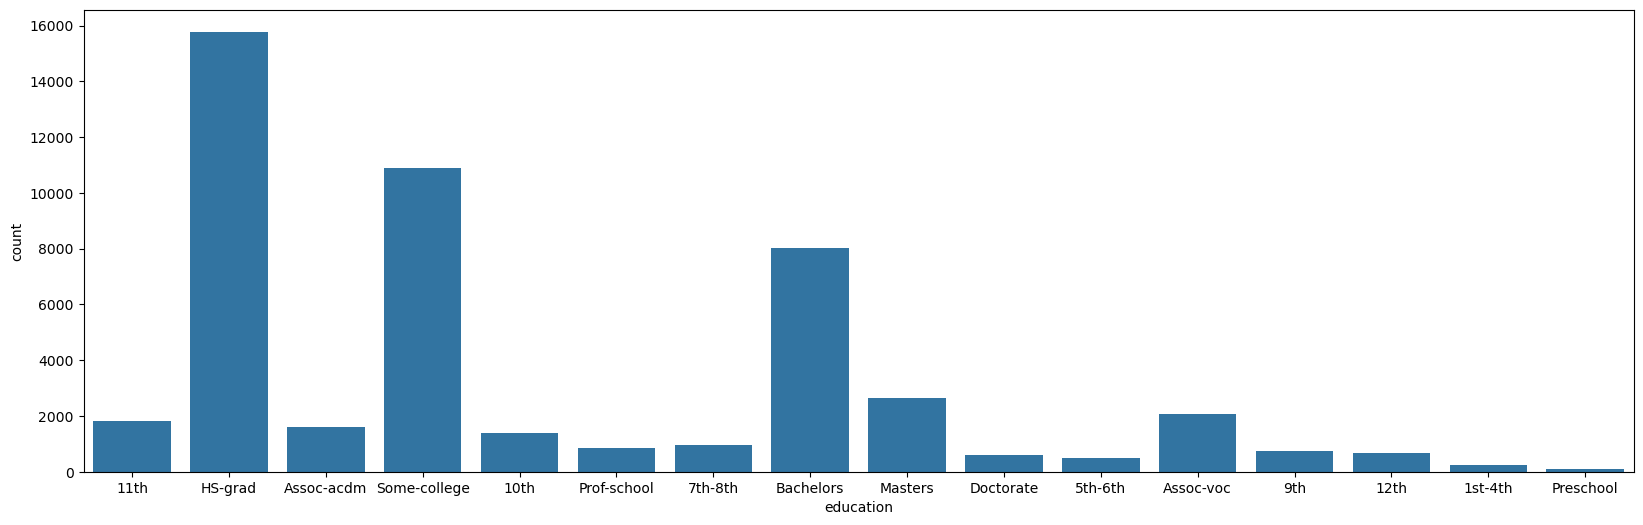

In [132]:
# 4. Countplot of Education
plt.figure(figsize=(20,6))

sns.countplot(data=adult, x="education")

HS-grad is most common. Yes, high education level has less people.

❓ **Plot 5**: *How does education level affect the likelihood of earning >50K? Which levels stand out?*

<Axes: xlabel='education', ylabel='income'>

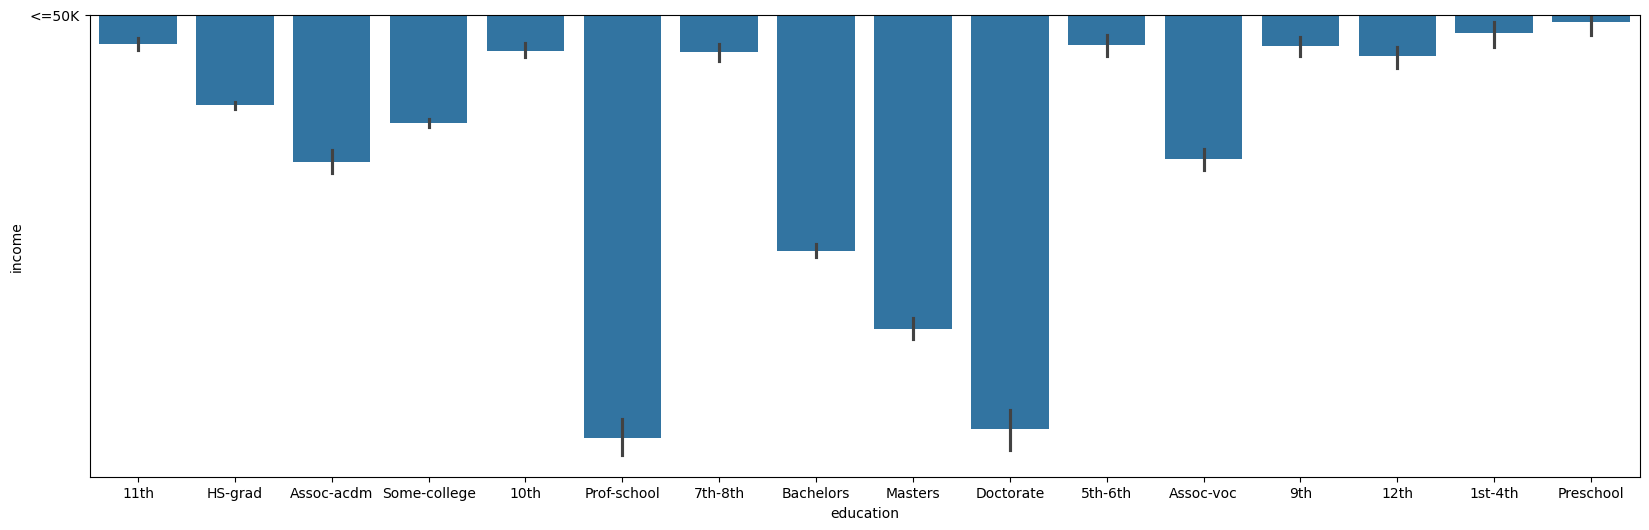

In [133]:
# 5. Income by Education
plt.figure(figsize=(20,6))

sns.barplot(x=adult.education, y=adult.income)

High education level often has high incomes. Prof-school stands out.

❓ **Plot 6**: *Do higher earners tend to be older? Which age groups dominate in each income class?*

<Axes: xlabel='age', ylabel='income'>

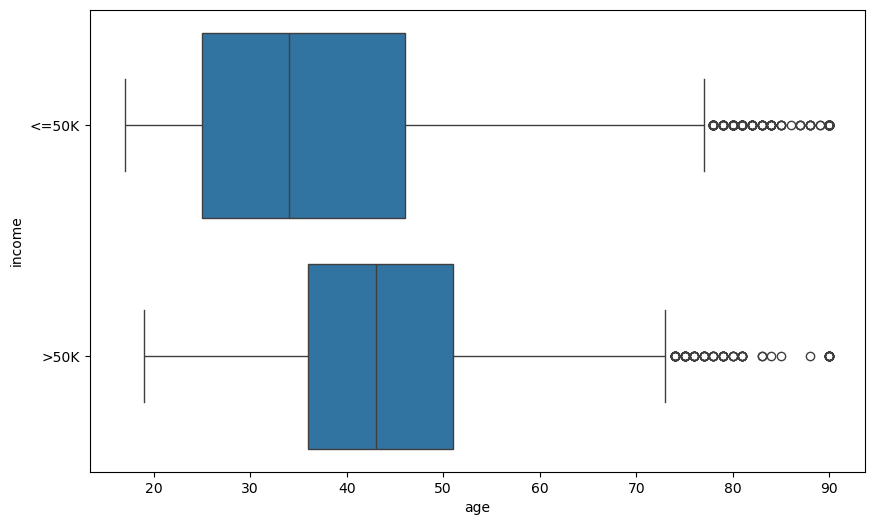

In [134]:
# 6. Boxplot of Age vs Income
plt.figure(figsize=(10,6))

sns.boxplot(data=adult, x="age", y="income")

Young people dominates the class with incomes less than 50k and miidle people dominates the class with incomes more than 50k.

❓ **Plot 7**: *Which numeric features are strongly correlated? Do you see any redundant features?*

<Axes: >

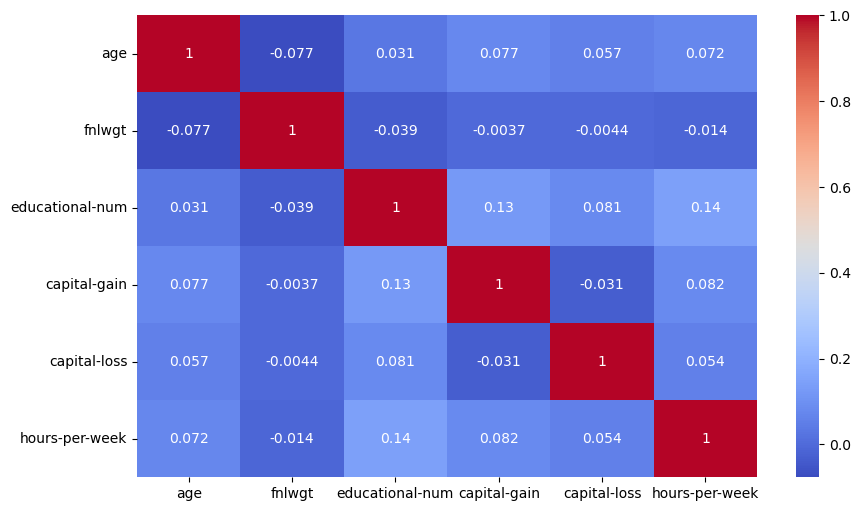

In [135]:
# 7. Correlation Heatmap
plt.figure(figsize=(10,6))

# select numeric features from original data
numeric_features = adult.select_dtypes(include=[np.number]).columns
numeric_data = adult[numeric_features]

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")

There are no features strongly correlated. Because the correlation values between every featurres are not near to -1 or 1. I think there is no redundant features.

❓ **Plot 8**: *Do you see income differences between genders? Which gender has a higher proportion earning >50K?*

<Axes: xlabel='gender', ylabel='count'>

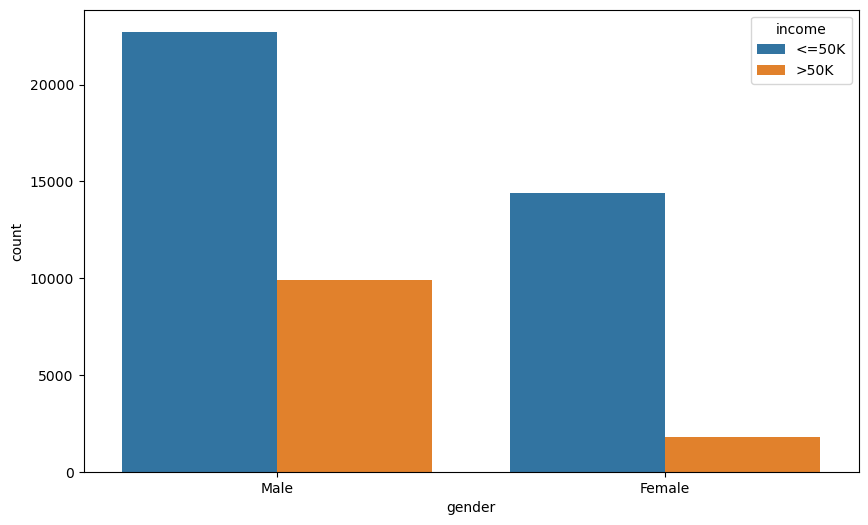

In [136]:
# 8. Gender vs Income
plt.figure(figsize=(10,6))

sns.countplot(data=adult, x="gender", hue="income")

Man has higher proportion earning > 50k.

❓ **Plot 9**: *Which races dominate the dataset? Do you think this could influence model fairness?*

<Axes: xlabel='race', ylabel='count'>

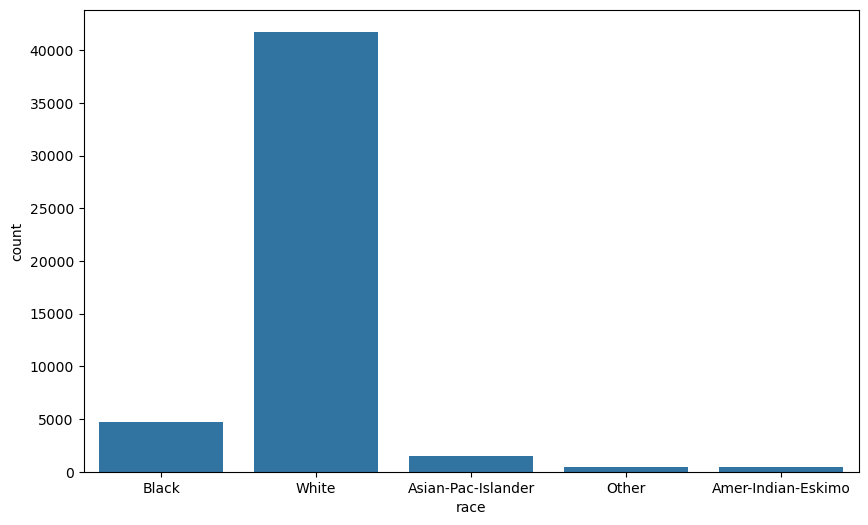

In [137]:
# 9. Race Distribution
plt.figure(figsize=(10,6))

sns.countplot(data=adult, x="race")

White people dominate the data set. I think this will make an influence on model fairness.

❓ **Plot 10**: *Which countries are most represented? Is the dataset mostly from one country?*

<Axes: xlabel='native-country', ylabel='count'>

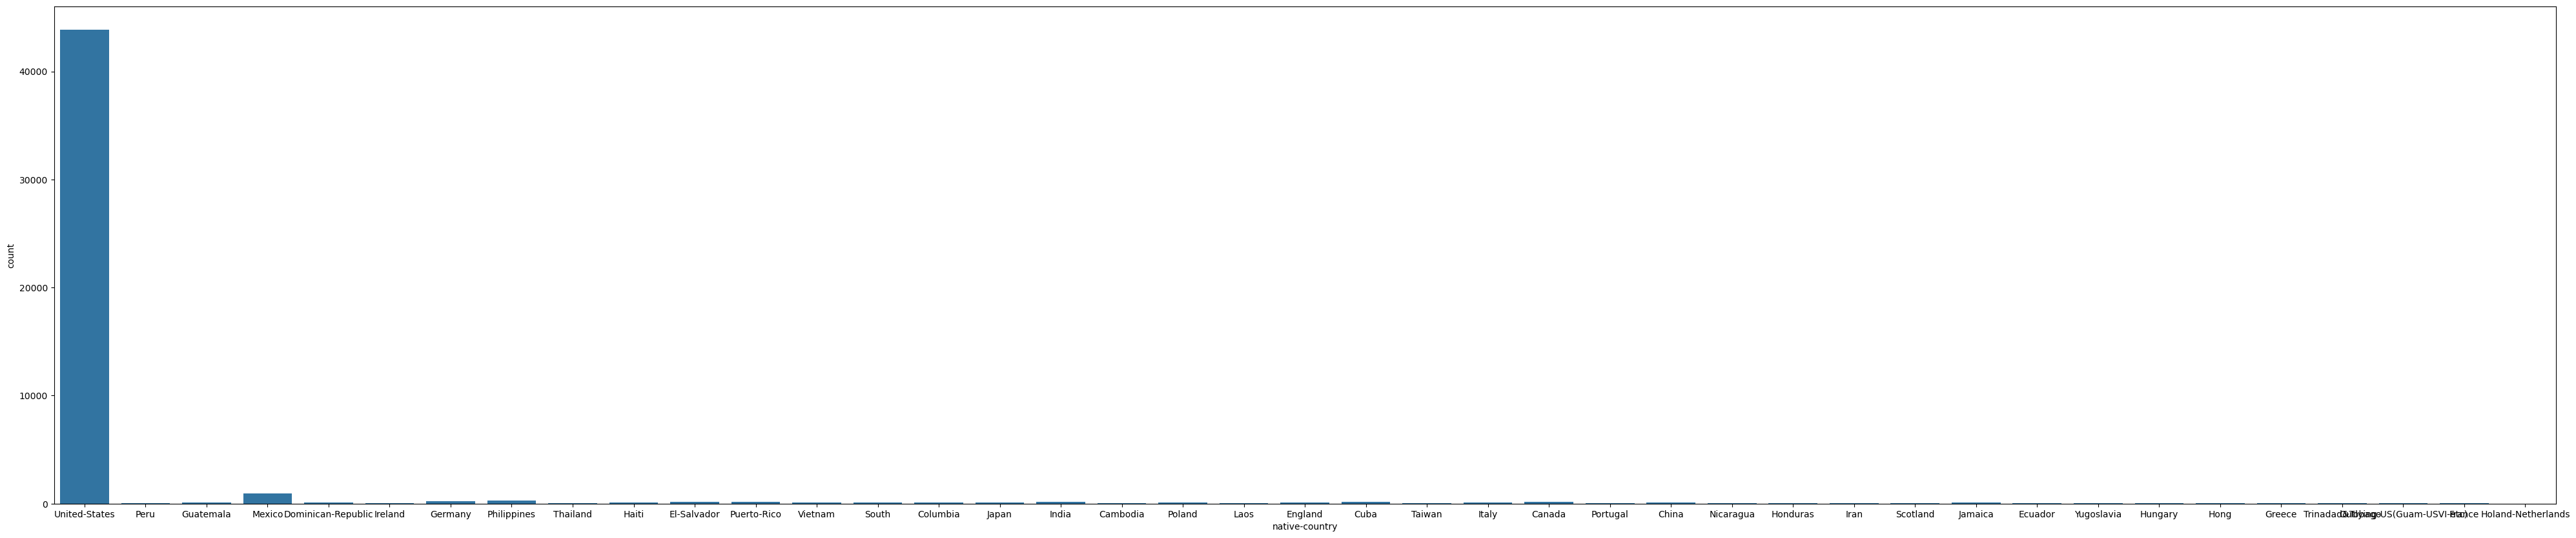

In [138]:
# 10. Native Country (Top 10)
plt.figure(figsize=(50,10))

sns.countplot(data=adult, x="native-country")

United-States.

## 6. Step 4 – Feature Engineering
- Separate features into **numerical** and **categorical**.
- Encode categorical variables (use `OneHotEncoder` or `pd.get_dummies()`).
- Scale numerical variables (`StandardScaler`).
- Combine features into final `X` and target `y`.

❓ **Question 4:** How many features are in your final processed dataset?

---

In [ ]:
# Features and target (X as input features and y as output (Target))
X = adult_new.iloc[:, :-1]
y = adult_new.iloc[:, -1]

# Identify categorical and numerical columns (You may use select_dtypes)
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Print categorical and numerical columns
print(numeric_cols)
print(categorical_cols)
print("111")

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['education', 'marital-status', 'relationship', 'race', 'gender'], dtype='object')


In [ ]:
# Preprocessing: OneHot for categorical, StandardScaler for numerical (Use ColumnTransformer)


# Final pipeline with Logistic Regression (Use Pipeline)



## 7. Step 5 – Train/Test Split
- Use `train_test_split` (80/20 split).
- Set `random_state=42` for reproducibility.

---

In [ ]:
#Split Data into Training and Testing


## 8. Step 6 – Model Training
- Use `LogisticRegression()` from sklearn.
- Fit model on training data.

❓ **Question 5:** What is the default penalty used in Logistic Regression?

---

In [ ]:
# Tarin Logistic Regression Model


## 9. Step 7 – Model Evaluation
- Predictions on test set → `model.predict(X_test)`
- Metrics:
  - Accuracy
  - Classification Report (precision, recall, F1-score)
- Visualizations:
  - Confusion matrix heatmap
  - ROC Curve
  - Precision-Recall Curve

❓ **Question 6:** What is the test accuracy of your model?  
❓ **Question 7:** Which class has better precision: `<=50K` or `>50K`?

---

In [ ]:
# Prediction on Test Score


# Accuracy Score


# Classification Resport


In [ ]:
# Visualizar Confusion Matrix

In [ ]:
#Plot ROC Curve


In [ ]:
# Plot Precision-Recall Curve


## 10. Step 8 – Model Improvement (Optional Challenge)
- Try adjusting `C` parameter of Logistic Regression.
- Compare results.

❓ **Question 8:** Did tuning `C` improve your results? Why/why not?

---

In [ ]:
# Try different values of C (regularization strength)
C_values = [0.01, 0.1, 1, 10, 100]
results = []

# Display results


## 11. Step 9 – Save the Model
- Use `joblib` to save your trained model:

## 12. Deploy Your Model

### Deployment Instructions
After saving the model (for example as `income_model.joblib`), open the provided **`app.py`** file.  
Inside `app.py`, make sure to load the model using the exact filename you saved:

`model = joblib.load("income_model.joblib")`

Run the following command in the **VS Code terminal**:

`python app.py`

This will display a message like:

`Running on local URL:  http://127.0.0.1:7860`

Click the link (http://127.0.0.1:7860) to launch the Gradio web app.  
Enter inputs (Age, Workclass, Education, etc.) and click **Predict Income** to see the result.

---

❓ **Reflection Question:**  
Why do we save the model as `.joblib` and load it later in `app.py` instead of retraining the model every time?
